In [1]:
import math
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import itertools
import matplotlib.pyplot as plt
plt.style.use ('ggplot')

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration if plots that will be created

Import the Data From Excel

In [2]:
df= pd.read_csv(r'C:\Users\Temitope\Documents\University of Liverpool\PhD\July 2023\Machine Learning\New Data\Combined\Valaski.csv')

In [3]:
df.head()

,Diameter,Height,Concrete_Modulus,Unconfined_Strain,Unconfined_Strength,FRP_Overall_Thickness,Fibre_Modulus,Rupture_Strain,Confining_Stress,Stiffness_Ratio,Strain_Ratio,Confined_Strength,Confined_Strain
0,150.0,300.0,28320.83685,0.24,42.00,0.12,240000,0.38,145.9200,0.833829,1.583333,46.00,0.92
1,150.0,300.0,28320.83685,0.24,42.00,0.35,240000,0.88,985.6000,5.632000,3.666667,77.00,2.12
2,150.0,300.0,28320.83685,0.24,42.00,0.70,240000,1.32,2956.8000,16.896000,5.500000,108.00,3.16
3,160.0,320.0,22252.69909,0.27,25.93,0.13,238000,1.31,506.6425,5.275491,4.851852,39.63,1.28
4,160.0,320.0,22252.69909,0.27,25.93,0.39,238000,1.32,1531.5300,15.947285,4.888889,66.14,1.52


PRE-PREPROCESSING

Data Normalization

In [4]:
from sklearn import preprocessing
cols=df.columns
df1 = pd.DataFrame(df)

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df1)
df1_normalized = pd.DataFrame(np_scaled, columns = cols)
df1_normalized.head()

,Diameter,Height,Concrete_Modulus,Unconfined_Strain,Unconfined_Strength,FRP_Overall_Thickness,Fibre_Modulus,Rupture_Strain,Confining_Stress,Stiffness_Ratio,Strain_Ratio,Confined_Strength,Confined_Strain
0,0.389764,0.243542,0.230793,0.378943,0.144675,0.000672,0.370079,0.092949,0.012682,0.034773,0.000883,0.069767,0.113145
1,0.389764,0.243542,0.230793,0.378943,0.144675,0.016118,0.370079,0.253205,0.108307,0.235987,0.002405,0.181713,0.312812
2,0.389764,0.243542,0.230793,0.378943,0.144675,0.039624,0.370079,0.394231,0.332792,0.708349,0.003744,0.293659,0.485857
3,0.429134,0.268143,0.067626,0.426716,0.037040,0.001343,0.366929,0.391026,0.053762,0.221037,0.003271,0.046764,0.173045
4,0.429134,0.268143,0.067626,0.426716,0.037040,0.018805,0.366929,0.394231,0.170479,0.668564,0.003298,0.142496,0.212978


In [5]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

Diameter - 0.0%
Height - 0.0%
Concrete_Modulus - 0.0%
Unconfined_Strain - 0.0%
Unconfined_Strength - 0.0%
FRP_Overall_Thickness - 0.0%
Fibre_Modulus - 0.0%
Rupture_Strain - 0.0%
Confining_Stress - 0.0%
Stiffness_Ratio - 0.0%
Strain_Ratio - 0.0%
Confined_Strength - 0.0%
Confined_Strain - 0.0%


In [6]:
df.dtypes

Diameter                 float64
Height                   float64
Concrete_Modulus         float64
Unconfined_Strain        float64
Unconfined_Strength      float64
FRP_Overall_Thickness    float64
Fibre_Modulus              int64
Rupture_Strain           float64
Confining_Stress         float64
Stiffness_Ratio          float64
Strain_Ratio             float64
Confined_Strength        float64
Confined_Strain          float64
dtype: object

MULTIVARIATE ANALYSIS

Pearson Correlation Matrix Heatmap

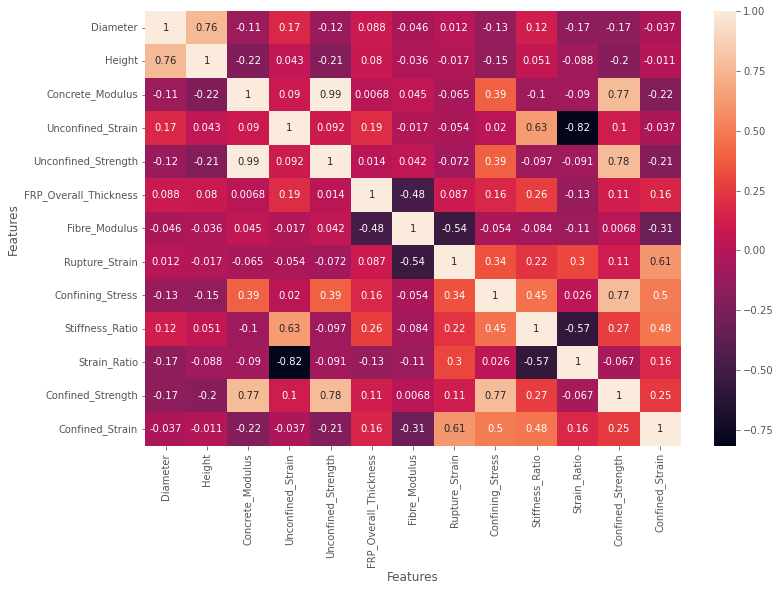

In [7]:
correlation_matrix = df.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title('')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

Data Distribution

C:\Users\Temitope\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Temitope\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Temitope\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

<AxesSubplot:xlabel='Confined_Strain', ylabel='Density'>

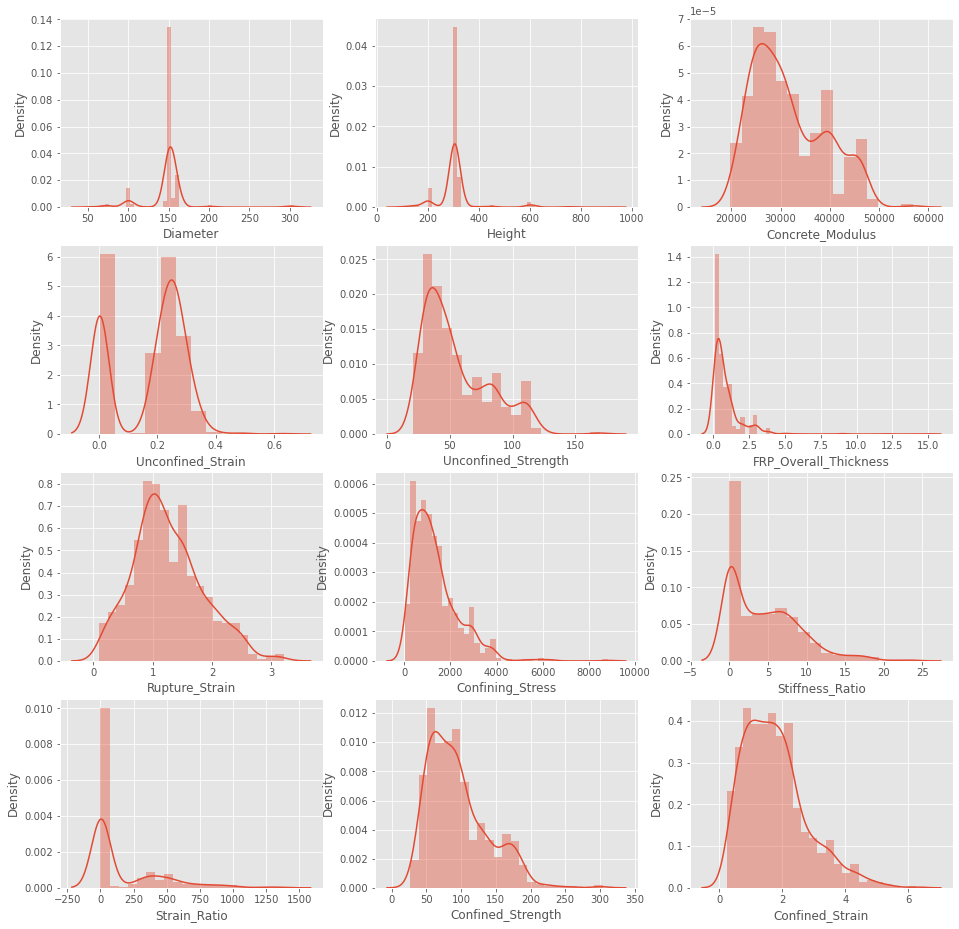

In [8]:
fig, ax2 = plt.subplots(4,3,figsize = (16,16))
sns.distplot(df['Diameter'],ax=ax2[0][0])
sns.distplot(df['Height'],ax=ax2[0][1])
sns.distplot(df['Concrete_Modulus'],ax=ax2[0][2])
sns.distplot(df['Unconfined_Strain'],ax=ax2[1][0])
sns.distplot(df['Unconfined_Strength'],ax=ax2[1][1])
sns.distplot(df['FRP_Overall_Thickness'],ax=ax2[1][2])
# sns.distplot(df['Fibre_Modulus'],ax=ax2[1][2])
sns.distplot(df['Rupture_Strain'],ax=ax2[2][0])
sns.distplot(df['Confining_Stress'],ax=ax2[2][1])
sns.distplot(df['Stiffness_Ratio'],ax=ax2[2][2])
sns.distplot(df['Strain_Ratio'],ax=ax2[3][0])
sns.distplot(df['Confined_Strength'],ax=ax2[3][1])
sns.distplot(df['Confined_Strain'],ax=ax2[3][2])

COMPRESSIVE STRENGTH PREDICTION 

In [9]:
x = df1_normalized.drop(['Confined_Strength'], axis = 1)
y = df1_normalized['Confined_Strength']

In [10]:
from scipy.stats import variation as sp

In [11]:
    from scipy.stats import zscore
from sklearn.model_selection import train_test_split

xscaled=x.apply(zscore)
xscaled_df =pd.DataFrame(xscaled,columns=df1_normalized.columns)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(xscaled,y,test_size=0.2, random_state = 1)

MACHINE LEARNING REGRESSION MODELS

Random Forest

In [13]:
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [14]:
y_pred = model.predict(x_test)

Model Performance on Training Data

In [15]:
model.score(x_train, y_train)

0.9884391691198997

In [16]:
model.score(x_test, y_test)

0.9422833304412171

In [17]:
from scipy.stats import variation

Testing for R_Accuracy

In [18]:
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
acc_R=metrics.r2_score(y_test, y_pred)
acc_R

0.9422833304412171

In [19]:
mean_absolute_error(y_test,y_pred)

0.024793283986531797

In [20]:
mse=metrics.mean_squared_error(y_test,y_pred)
print("MSE",mse)

MSE 0.0015345069997831637


In [21]:
rmse=math.sqrt(mse)
print("RMSE",rmse)

RMSE 0.03917278391668332


In [22]:
mean_absolute_percentage_error(y_test, y_pred)

0.1286764347270731

Plot

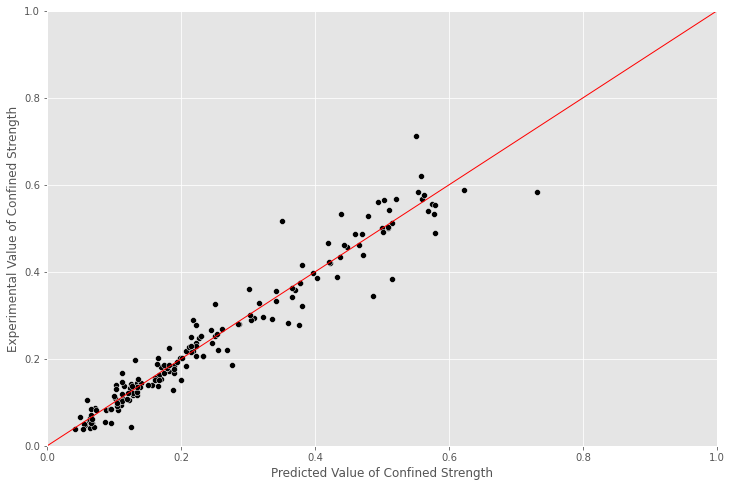

In [23]:
y_min = y.min()
y_max = y.max()

ax = sns.scatterplot(x=y_pred, y=y_test, color='k')
ax.set(ylim=(y_min, y_max))
ax.set(xlim=(y_min, y_max))
ax.set_xlabel("Predicted Value of Confined Strength")
ax.set_ylabel("Experimental Value of Confined Strength")

X_ref = Y_ref = np.linspace(y_min, y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.show()

XGBoost

In [24]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
xgr = XGBRegressor ()
xgr.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [25]:
y_pred = xgr.predict(x_test)

In [26]:
xgr.score(x_train, y_train)

0.9998824259065403

In [27]:
acc_xgr = metrics.r2_score(y_test, y_pred)
acc_xgr

0.9534042652783702

In [28]:
mean_absolute_error(y_test,y_pred)

0.021134883831284434

In [29]:
mse=metrics.mean_squared_error(y_test,y_pred)
print("MSE",mse)

MSE 0.0012388358794257542


In [30]:
rmse=math.sqrt(mse)
print("RMSE",rmse)

RMSE 0.03519710044060099


In [31]:
mean_absolute_percentage_error(y_test, y_pred)

0.1148928147001412

Plot

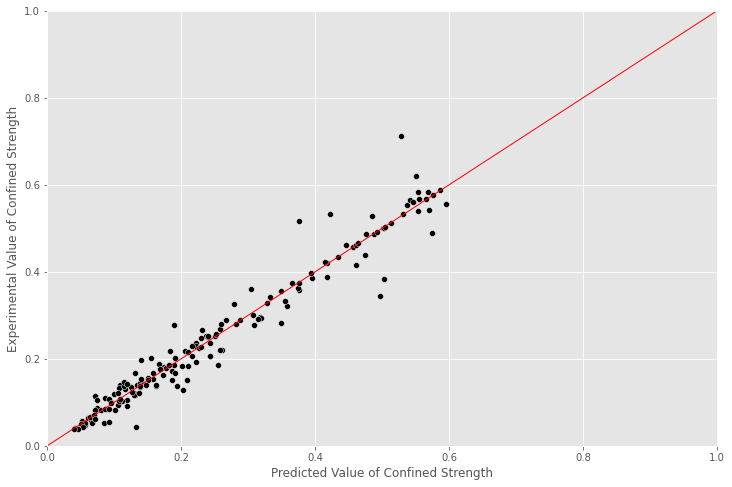

In [32]:
y_min = y.min()
y_max = y.max()

ax = sns.scatterplot(x=y_pred, y=y_test, color='k')
ax.set(ylim=(y_min, y_max))
ax.set(xlim=(y_min, y_max))
ax.set_xlabel("Predicted Value of Confined Strength")
ax.set_ylabel("Experimental Value of Confined Strength")

X_ref = Y_ref = np.linspace(y_min, y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.show()

Decision Tree

In [33]:
from sklearn.tree import DecisionTreeRegressor

dec_model = DecisionTreeRegressor()
dec_model.fit(x_train, y_train)

DecisionTreeRegressor()

Printing the Feature's Importance

In [34]:
print('Feature Importances: \n',pd.DataFrame(dec_model.feature_importances_, columns=['Importance'],index=x_train.columns))

Feature Importances: 
                        Importance
Diameter                 0.000788
Height                   0.003061
Concrete_Modulus         0.106764
Unconfined_Strain        0.004448
Unconfined_Strength      0.177524
FRP_Overall_Thickness    0.004122
Fibre_Modulus            0.005842
Rupture_Strain           0.038829
Confining_Stress         0.621743
Stiffness_Ratio          0.009544
Strain_Ratio             0.005383
Confined_Strain          0.021953


In [35]:
y_pred = dec_model.predict(x_test)

In [36]:
dec_model.score(x_train,y_train)

0.9999653842314836

In [37]:
dec_model.score(x_test,y_test)

0.9244136464734862

In [38]:
acc_DT = metrics.r2_score(y_test, y_pred)
acc_DT

0.9244136464734862

In [39]:
mean_absolute_error(y_test,y_pred)

0.02824865043720124

In [40]:
mse=metrics.mean_squared_error(y_test,y_pred)
print("MSE",mse)

MSE 0.002009606400736444


In [41]:
rmse=math.sqrt(mse)
print("RMSE",rmse)

RMSE 0.04482863371480826


In [42]:
mean_absolute_percentage_error(y_test, y_pred)

0.16900549695669842

Plot

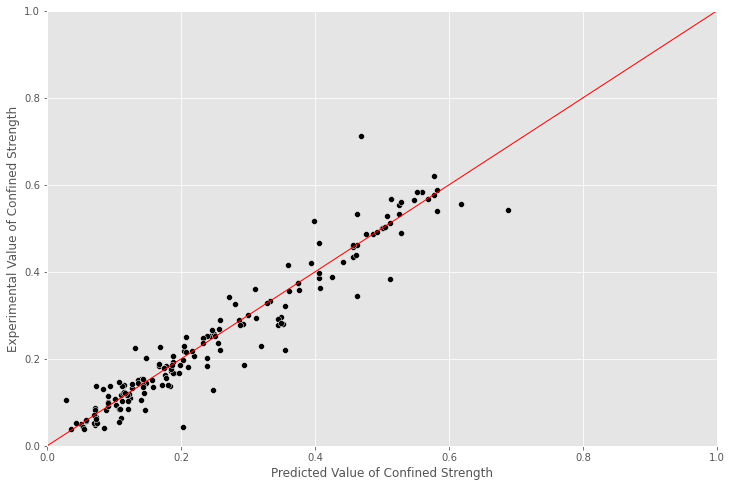

In [43]:
y_min = y.min()
y_max = y.max()

ax = sns.scatterplot(x=y_pred, y=y_test, color='k')
ax.set(ylim=(y_min, y_max))
ax.set(xlim=(y_min, y_max))
ax.set_xlabel("Predicted Value of Confined Strength")
ax.set_ylabel("Experimental Value of Confined Strength")

X_ref = Y_ref = np.linspace(y_min, y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.show() 

STRAIN PREDICTIONS

In [44]:
x = df1_normalized.drop(['Confined_Strain'], axis = 1)
y = df1_normalized['Confined_Strain']

In [45]:
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

xscaled=x.apply(zscore)
xscaled_df =pd.DataFrame(xscaled,columns=df1_normalized.columns)

In [46]:
x_train, x_test, y_train, y_test = train_test_split(xscaled,y,test_size=0.2, random_state = 1)

Random Forest

In [47]:
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [48]:
y_pred = model.predict(x_test)

In [49]:
model.score(x_train, y_train)

0.9802435545013422

In [50]:
model.score(x_test, y_test)

0.9063693871321645

In [51]:
mean_absolute_error(y_test,y_pred)

0.03412645590682198

In [52]:
mse=metrics.mean_squared_error(y_test,y_pred)
print("MSE",mse)

MSE 0.002264179472191062


In [53]:
rmse=math.sqrt(mse)
print("RMSE",rmse)

RMSE 0.04758339492082361


In [54]:
mean_absolute_percentage_error(y_test, y_pred)

0.24398074378353257

Plot

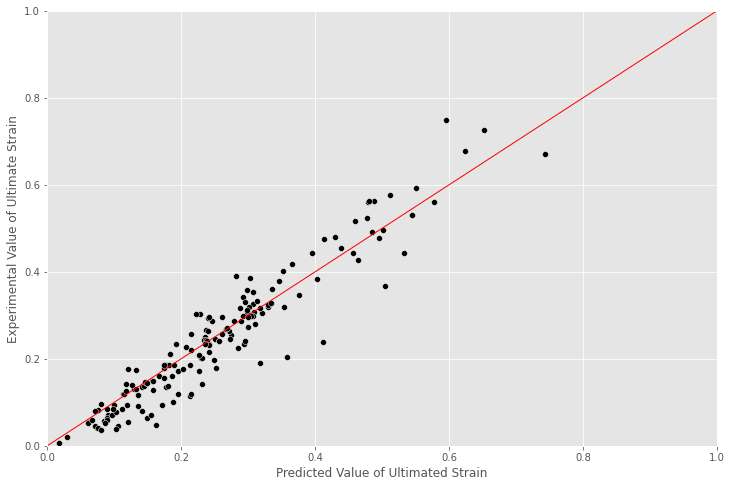

In [55]:
y_min = y.min()
y_max = y.max()

ax = sns.scatterplot(x=y_pred, y=y_test, color='k')
ax.set(ylim=(y_min, y_max))
ax.set(xlim=(y_min, y_max))
ax.set_xlabel("Predicted Value of Ultimated Strain")
ax.set_ylabel("Experimental Value of Ultimate Strain")

X_ref = Y_ref = np.linspace(y_min, y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.show()

XGBoost

In [56]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
xgr = XGBRegressor ()
xgr.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [57]:
y_pred = xgr.predict(x_test)

In [58]:
xgr.score(x_train, y_train)

0.9998619209066483

In [59]:
acc_xgr = metrics.r2_score(y_test, y_pred)
acc_xgr

0.9053933748519262

In [60]:
mean_absolute_error(y_test,y_pred)

0.033130983796776266

In [61]:
mse=metrics.mean_squared_error(y_test,y_pred)
print("MSE",mse)

MSE 0.0022877814427628186


In [62]:
rmse=math.sqrt(mse)
print("RMSE",rmse)

RMSE 0.04783075833355372


In [63]:
mean_absolute_percentage_error(y_test, y_pred)

0.2153103027308249

Plot

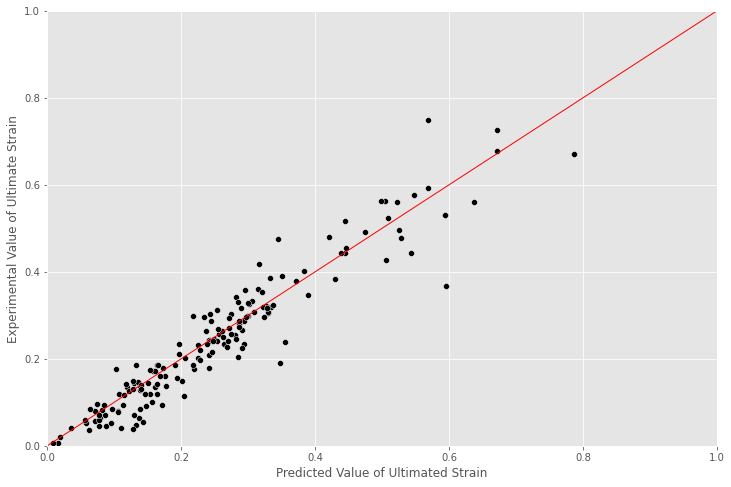

In [64]:
y_min = y.min()
y_max = y.max()

ax = sns.scatterplot(x=y_pred, y=y_test, color='k')
ax.set(ylim=(y_min, y_max))
ax.set(xlim=(y_min, y_max))
ax.set_xlabel("Predicted Value of Ultimated Strain")
ax.set_ylabel("Experimental Value of Ultimate Strain")

X_ref = Y_ref = np.linspace(y_min, y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.show()

Decision Tree

In [65]:
from sklearn.tree import DecisionTreeRegressor

dec_model = DecisionTreeRegressor()
dec_model.fit(x_train, y_train)

DecisionTreeRegressor()

In [66]:
print('Feature Importances: \n',pd.DataFrame(dec_model.feature_importances_, columns=['Importance'],index=x_train.columns))

Feature Importances: 
                        Importance
Diameter                 0.002267
Height                   0.010573
Concrete_Modulus         0.160778
Unconfined_Strain        0.024285
Unconfined_Strength      0.047296
FRP_Overall_Thickness    0.013175
Fibre_Modulus            0.083788
Rupture_Strain           0.202286
Confining_Stress         0.347626
Stiffness_Ratio          0.037518
Strain_Ratio             0.012584
Confined_Strength        0.057824


In [67]:
y_pred = dec_model.predict(x_test)

In [68]:
dec_model.score(x_train,y_train)

1.0

In [69]:
dec_model.score(x_test,y_test)

0.796615618066386

In [70]:
acc_DT = metrics.r2_score(y_test, y_pred)
acc_DT

0.796615618066386

In [71]:
mean_absolute_error(y_test,y_pred)

0.046144023526680344

In [72]:
mse=metrics.mean_squared_error(y_test,y_pred)
print("MSE",mse)

MSE 0.004918249794950865


In [73]:
rmse=math.sqrt(mse)
print("RMSE",rmse)

RMSE 0.07013023452798989


In [74]:
mean_absolute_percentage_error(y_test, y_pred)

0.3081735512495363

Plot

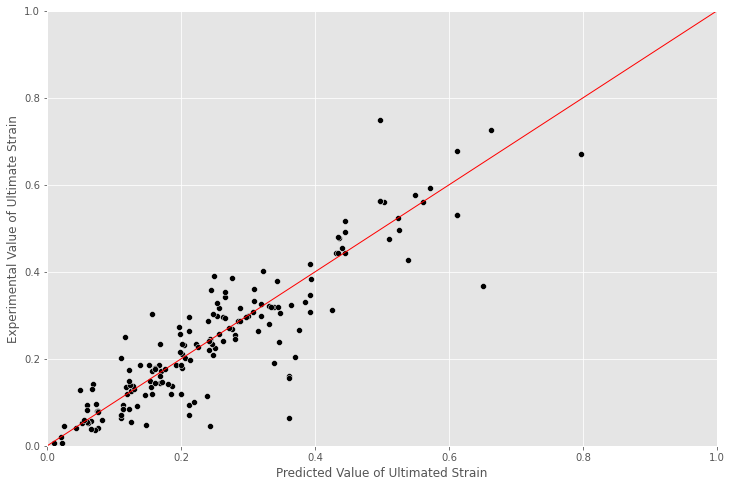

In [75]:
y_min = y.min()
y_max = y.max()

ax = sns.scatterplot(x=y_pred, y=y_test, color='k')
ax.set(ylim=(y_min, y_max))
ax.set(xlim=(y_min, y_max))
ax.set_xlabel("Predicted Value of Ultimated Strain")
ax.set_ylabel("Experimental Value of Ultimate Strain")

X_ref = Y_ref = np.linspace(y_min, y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.show()